<a href="https://colab.research.google.com/github/IBM-EPBL/IBM-Project-22504-1659853298/blob/main/Assignments/Sundareswar%20M/Assignment_2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 2**


**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

**Connecting to Google drive**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


**Declaring Path**

In [ ]:
path = 'drive/My Drive/'

In [ ]:
import pandas as pd

**Loading the dataset into google colab**

In [ ]:
ds = pd.read_csv(path+'50_Startups.csv')

In [ ]:
ds.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
ds.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
103,119943.24,156547.42,256512.92,Florida,132602.65
104,114523.61,122616.84,261776.23,New York,129917.04
105,78013.11,121597.55,264346.06,California,126992.93
106,94657.16,145077.58,282574.31,New York,125370.37
107,91749.16,114175.79,294919.57,Florida,124266.90


In [ ]:
ds.shape

(108, 5)

In [ ]:
X = ds.iloc[:,3:13]
X.head()

,State,Profit
0,New York,192261.83
1,California,191792.06
2,Florida,191050.39
3,New York,182901.99
4,Florida,166187.94


In [ ]:
y = ds.iloc[:,1:3]
y.head()

,Administration,Marketing Spend
0,136897.80,471784.10
1,151377.59,443898.53
2,101145.55,407934.54
3,118671.85,383199.62
4,91391.77,366168.42


**Performing Data** **Visualization**

(array([ 2.,  6.,  4., 12., 20., 16., 20., 16.,  4.,  8.]),
 array([ 14681.4  ,  32439.443,  50197.486,  67955.529,  85713.572,
        103471.615, 121229.658, 138987.701, 156745.744, 174503.787,
        192261.83 ]),
 <a list of 10 Patch objects>)

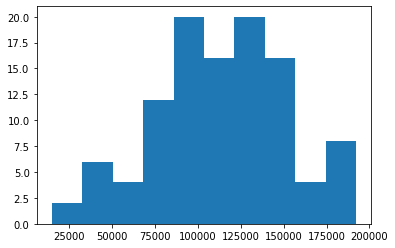

In [ ]:
plt.hist(ds['Profit'])


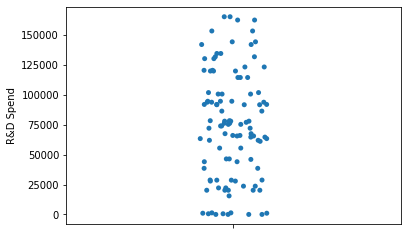

In [ ]:
sns.stripplot(y=ds['R&D Spend'])

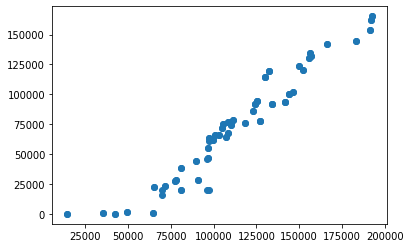

In [ ]:
plt.scatter(ds['Profit'], ds['R&D Spend'])

New York      39
California    36
Florida       33
Name: State, dtype: int64


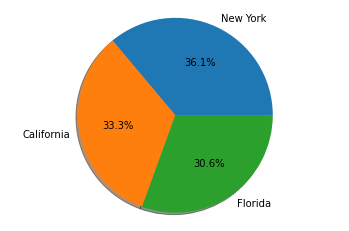

In [ ]:
labels = ['New York','California','Florida']
sizes = X['State'].value_counts()
print(sizes)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

Text(0, 0.5, 'Profit')

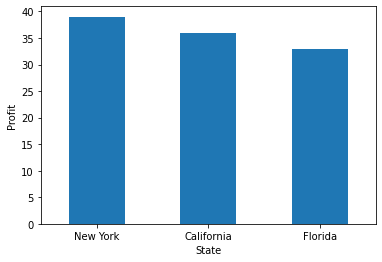

In [ ]:
gn=pd.value_counts(ds['State'], sort = True)
gn.plot(kind='bar',rot=0)
plt.xlabel('State')
plt.ylabel('Profit')

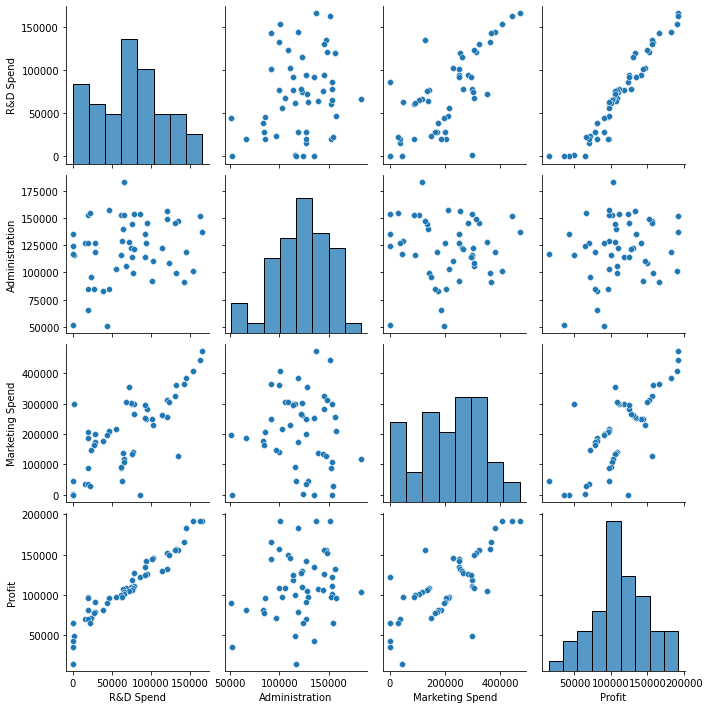

In [ ]:
scattering=sns.pairplot(ds)


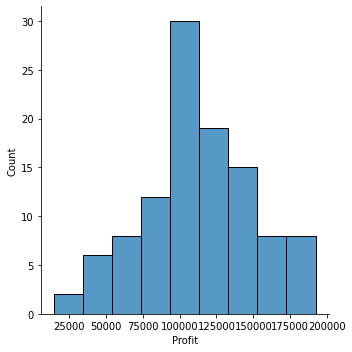

In [ ]:
print(sns.displot(ds['Profit']))

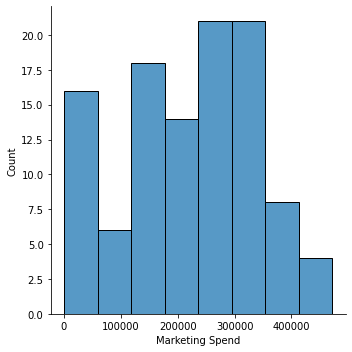

In [ ]:
print(sns.displot(ds['Marketing Spend']))

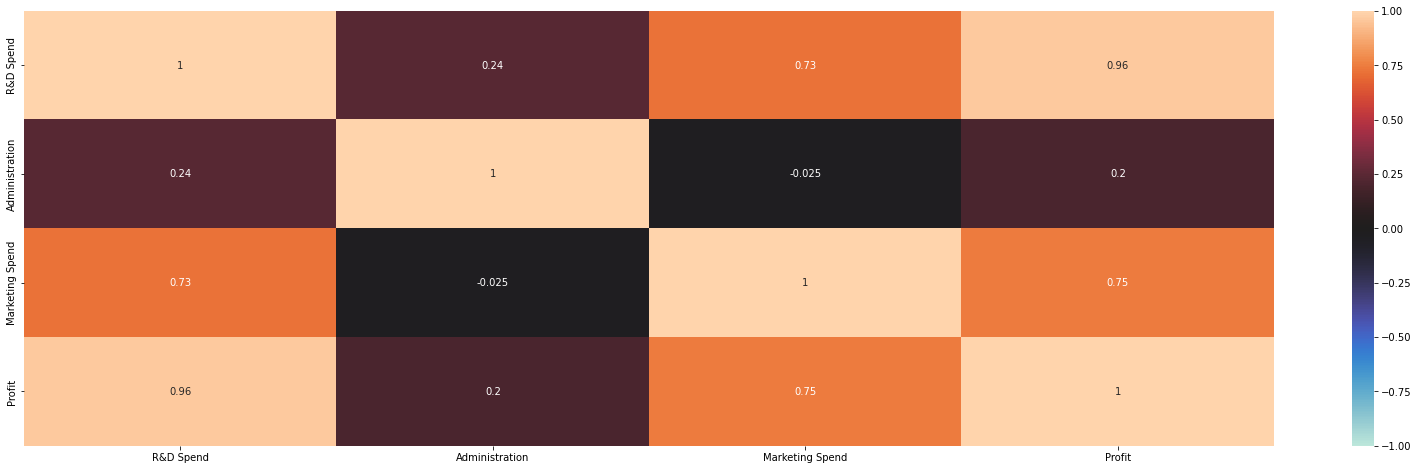

In [ ]:
plt.figure(figsize=(28,8))
corr=ds.corr()
sns.heatmap(corr,annot=True,vmin=-1, vmax=1, center= 0);

**Descriptive Statistics**

In [ ]:
ds.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,108.000000,108.000000,108.000000,108.000000
mean,74959.338704,121750.788889,214952.664722,113523.760000
std,44996.368152,27322.385654,117937.942120,38991.013654
min,0.000000,51283.140000,0.000000,14681.400000
25%,38558.510000,105077.645000,134050.070000,90708.190000
50%,75791.365000,122699.795000,239452.750000,109543.120000
75%,101913.080000,145077.580000,298664.470000,141585.520000
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
ds.describe(include=['object'])

,State
count,108
unique,3
top,New York
freq,39


In [ ]:
ds.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


R&D Spend           74959.338704
Administration     121750.788889
Marketing Spend    214952.664722
Profit             113523.760000
dtype: float64

In [ ]:
ds.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


R&D Spend           75791.365
Administration     122699.795
Marketing Spend    239452.750
Profit             109543.120
dtype: float64

In [ ]:
ds.mode()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,20229.59,91790.61,0.0,New York,124266.90
1,NaN,114175.79,NaN,NaN,125370.37
2,NaN,121597.55,NaN,NaN,126992.93
3,NaN,122616.84,NaN,NaN,129917.04
4,NaN,127320.38,NaN,NaN,132602.65
5,NaN,135495.07,NaN,NaN,134307.35
6,NaN,145077.58,NaN,NaN,141585.52
7,NaN,156547.42,NaN,NaN,144259.40


In [ ]:
ds.notnull()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
...,...,...,...,...,...
103,True,True,True,True,True
104,True,True,True,True,True
105,True,True,True,True,True
106,True,True,True,True,True


**Finding and Handling the Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


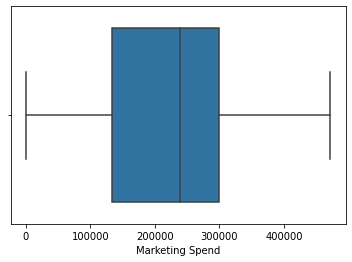

In [ ]:
sns.boxplot(ds['Marketing Spend'])

In [ ]:
print(np.where(ds['State']))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107]),)


**Splitting the data into dependent and independent variables.**

In [ ]:
X = ds.iloc[:, :-1].values
print(X)
y = ds.iloc[:, -1].values
print(y)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

**Scaling the independent variables**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
object= StandardScaler()

In [ ]:
x = ds[["Profit"]]
scale = StandardScaler()
st_scale = scale.fit_transform(x)
st_scale

array([[ 2.02880464],
       [ 2.01670031],
       [ 1.99759006],
       [ 1.7876343 ],
       [ 1.3569717 ],
       [ 1.12000182],
       [ 1.09762078],
       [ 1.08808949],
       [ 0.99685469],
       [ 0.93368012],
       [ 0.83994133],
       [ 0.79194993],
       [ 0.72305339],
       [ 0.53552041],
       [ 0.49159626],
       [ 0.42239748],
       [ 0.3470534 ],
       [ 0.3052457 ],
       [ 0.27681314],
       [ 0.23842002],
       [ 0.12755114],
       [-0.05696304],
       [-0.08171872],
       [-0.12341562],
       [-0.12810383],
       [-0.15767605],
       [-0.20072672],
       [-0.21941336],
       [-0.26388454],
       [-0.32257393],
       [-0.35006808],
       [-0.41329984],
       [-0.41473555],
       [-0.43145595],
       [-0.43315963],
       [-0.4391707 ],
       [-0.58787743],
       [-0.60743549],
       [-0.83212145],
       [-0.83787511],
       [-0.90914139],
       [-0.92050648],
       [-1.0828442 ],
       [-1.12766529],
       [-1.24512575],
       [-1

**SPLIT DATA INTO TRAINING AND TESTING**

In [ ]:
ds.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
x=ds.drop('Administration',axis=1)
y=ds['Administration']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20, random_state=0)
print('x_train size: {}, x_testsize: {}'.format(x_train.shape,x_test.shape))
print('y_train size: {}, y_testsize: {}'.format(y_train.shape,y_test.shape))

x_train size: (86, 4), x_testsize: (22, 4)
y_train size: (86,), y_testsize: (22,)
